# Import Libraries

In [1]:
library("tidyverse")
library(Metrics)
library(mctest)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Import Files

In [2]:
test = read_csv("data/test.csv")
train = read_csv("data/train.csv")
sample = read_csv("data/sample_submission.csv")

Parsed with column specification:
cols(
  Date = col_character(),
  Store = col_character(),
  Item = col_double()
)
Parsed with column specification:
cols(
  Date = col_character(),
  Store = col_character(),
  Item = col_double(),
  Sales = col_double()
)
Parsed with column specification:
cols(
  id = col_double(),
  sales = col_double()
)


# Preprocessing

In [3]:
head(train)

Date,Store,Item,Sales
1-Jan-17,KMart,1,13
2-Jan-17,KMart,1,11
3-Jan-17,KMart,1,14
4-Jan-17,KMart,1,13
5-Jan-17,KMart,1,10
6-Jan-17,KMart,1,12


In [4]:
train$Date <- as.Date(train$Date, "%d-%b-%y")

In [5]:
train$Day <- format(train$Date, "%d")
train$Month <- format(train$Date, "%m")
train$Year <- format(train$Date, "%Y")

In [6]:
train$fStore <- as.numeric(factor(train$Store))

In [7]:
summary(train)

      Date               Store                Item          Sales       
 Min.   :2017-01-01   Length:821000      Min.   : 1.0   Min.   :  0.00  
 1st Qu.:2018-02-15   Class :character   1st Qu.:13.0   1st Qu.: 29.00  
 Median :2019-04-01   Mode  :character   Median :25.5   Median : 46.00  
 Mean   :2019-04-01                      Mean   :25.5   Mean   : 51.23  
 3rd Qu.:2020-05-16                      3rd Qu.:38.0   3rd Qu.: 68.00  
 Max.   :2021-06-30                      Max.   :50.0   Max.   :214.00  
     Day               Month               Year               fStore    
 Length:821000      Length:821000      Length:821000      Min.   : 1.0  
 Class :character   Class :character   Class :character   1st Qu.: 3.0  
 Mode  :character   Mode  :character   Mode  :character   Median : 5.5  
                                                          Mean   : 5.5  
                                                          3rd Qu.: 8.0  
                                                   

# Trial 1

In [8]:
trial1 <- lm(Sales ~ ., data = train)
summary(trial1)


Call:
lm(formula = Sales ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.500 -18.255  -1.235  16.201 127.907 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -3.261e+04  2.937e+03 -11.102  < 2e-16 ***
Date                  1.900e+00  1.711e-01  11.108  < 2e-16 ***
StoreAsian SuperMart -3.302e+00  1.187e-01 -27.823  < 2e-16 ***
StoreBig Savers       2.393e+01  1.187e-01 201.628  < 2e-16 ***
StoreBigW             4.036e-02  1.187e-01   0.340    0.734    
StoreColes            1.942e+01  1.187e-01 163.592  < 2e-16 ***
StoreCostco           1.501e+01  1.187e-01 126.469  < 2e-16 ***
StoreKMart            7.378e+00  1.187e-01  62.160  < 2e-16 ***
StoreSupaIGA          1.862e+01  1.187e-01 156.837  < 2e-16 ***
StoreTarget           2.676e+01  1.187e-01 225.438  < 2e-16 ***
StoreWoolies          1.487e+01  1.187e-01 125.286  < 2e-16 ***
Item                 -1.096e-01  1.83

In [9]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(train))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(train)), size = smp_size)

train1z <- train[train_ind, ]
test1 <- train[-train_ind, ]

forecast1 <- predict(trial1, test1)

smape(test1$Sales, forecast1)

Warning message in predict.lm(trial1, test1):
“prediction from a rank-deficient fit may be misleading”

[1] 0.4053069

In [10]:
head(forecast1)

1        2        3        4        5        6 
24.66379 25.24645 24.95664 24.77864 24.98867 25.01293

In [11]:
head(test1)

Date,Store,Item,Sales,Day,Month,Year,fStore
2017-01-01,KMart,1,13,01,01,2017,7
2017-01-05,KMart,1,10,05,01,2017,7
2017-01-07,KMart,1,10,07,01,2017,7
2017-01-08,KMart,1,9,08,01,2017,7
2017-01-11,KMart,1,9,11,01,2017,7
2017-01-13,KMart,1,10,13,01,2017,7


In [12]:
predict(trial1, slice(train, 1:10))

Warning message in predict.lm(trial1, slice(train, 1:10)):
“prediction from a rank-deficient fit may be misleading”

1        2        3        4        5        6        7        8 
24.66379 24.90449 25.05916 24.95560 25.24645 25.04723 24.95664 24.77864 
       9       10 
24.82541 25.05208

In [13]:
slice(test1[c(2,3,5,6,7)], 1:10)

Store,Item,Day,Month,Year
KMart,1,01,01,2017
KMart,1,05,01,2017
KMart,1,07,01,2017
KMart,1,08,01,2017
KMart,1,11,01,2017
KMart,1,13,01,2017
KMart,1,14,01,2017
KMart,1,22,01,2017
KMart,1,24,01,2017
KMart,1,27,01,2017


# Trial 2

remove some outliers

In [14]:
train2 <- train

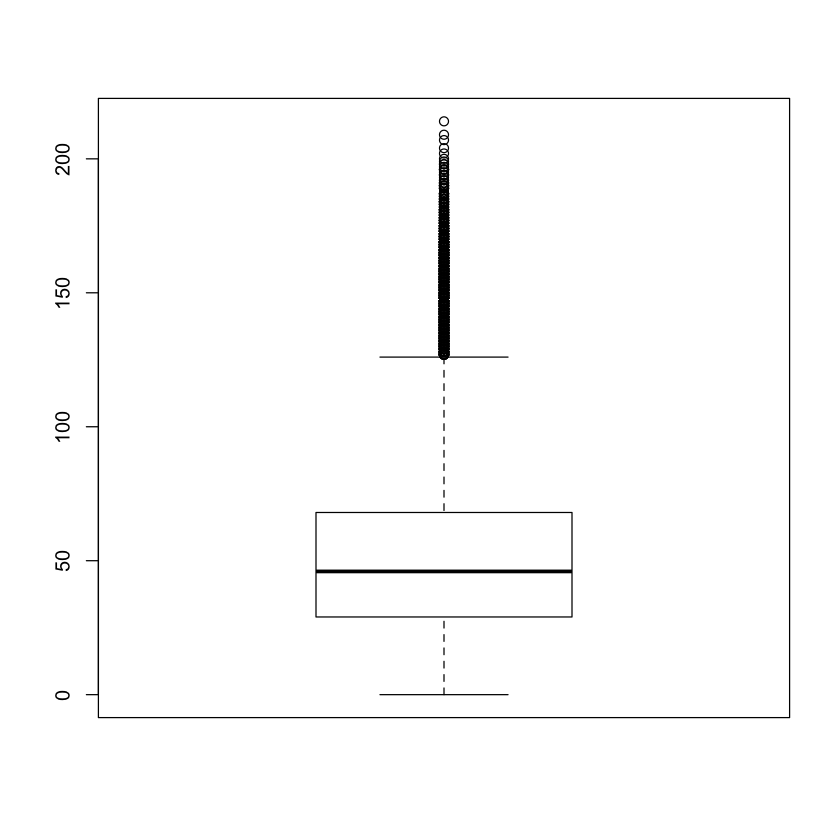

In [15]:
boxplot(train2$Sales)

In [16]:
outliers <- boxplot.stats(train$Sales)$out
train2 <- train[-which(train$Sales %in% outliers),]

In [17]:
outliers <- boxplot.stats(train2$Sales)$out
train2 <- train2[-which(train2$Sales %in% outliers),]

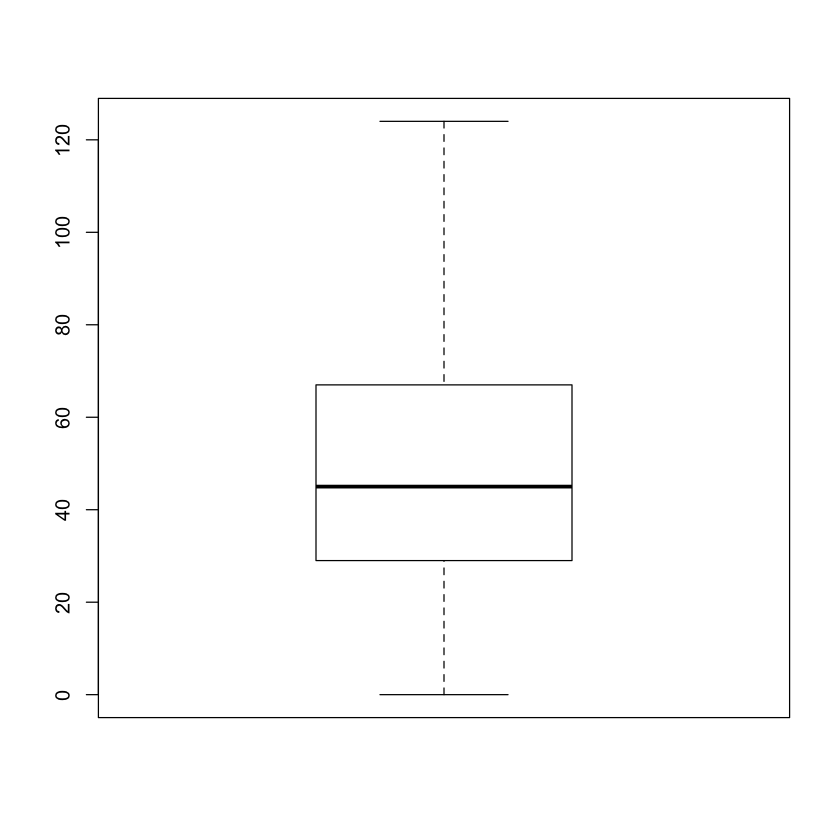

In [18]:
boxplot(train2$Sales)

In [19]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(train2))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(train2)), size = smp_size)

train2z <- train2[train_ind, ]
test2 <- train2[-train_ind, ]

In [20]:
trial2 <- lm(Sales ~ Store + Item + Month + Year, data = train2z)
summary(trial2)


Call:
lm(formula = Sales ~ Store + Item + Month + Year, data = train2z)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.604 -17.744  -1.125  16.048  77.216 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          19.309701   0.148668 129.885   <2e-16 ***
StoreAsian SuperMart -3.331665   0.128905 -25.846   <2e-16 ***
StoreBig Savers      20.956898   0.130339 160.788   <2e-16 ***
StoreBigW             0.097178   0.128924   0.754    0.451    
StoreColes           17.800718   0.129586 137.366   <2e-16 ***
StoreCostco          14.201981   0.129220 109.905   <2e-16 ***
StoreKMart            7.332271   0.128780  56.937   <2e-16 ***
StoreSupaIGA         17.313878   0.129492 133.706   <2e-16 ***
StoreTarget          22.919231   0.130707 175.348   <2e-16 ***
StoreWoolies         14.093397   0.129133 109.139   <2e-16 ***
Item                 -0.098137   0.002007 -48.889   <2e-16 ***
Month02               3.815806   0.135902  28.078   <2e-16 ***

In [21]:
forecast2 <- predict(trial2, test2)

In [22]:
smape(test2$Sales, forecast2)

[1] 0.4011897

# Trial 3

Normality

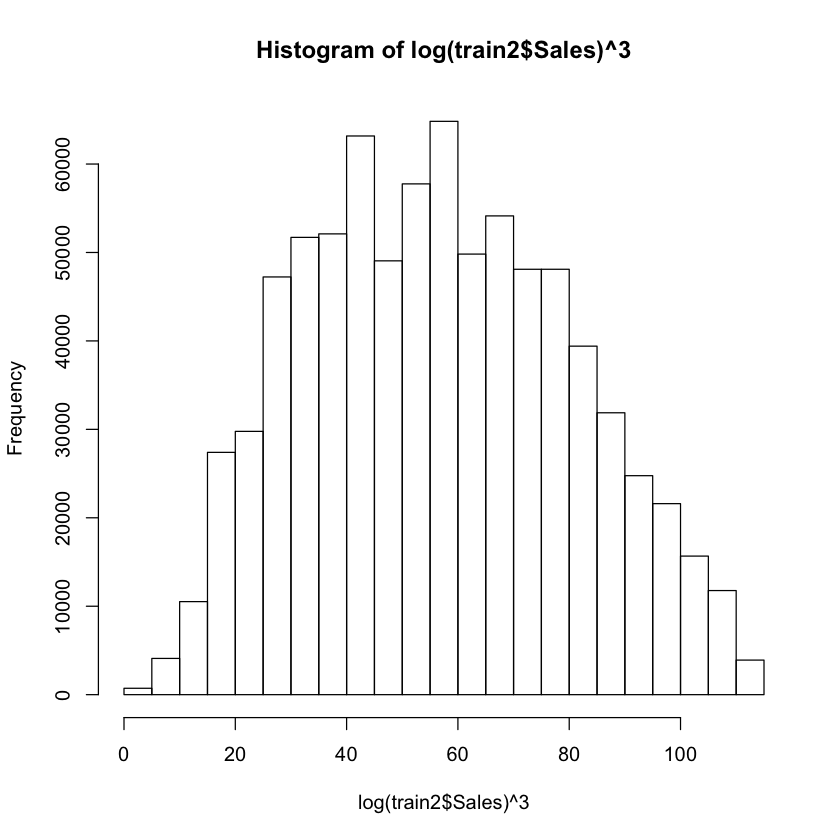

In [23]:
hist(log(train2$Sales)^3)

In [24]:
train3 <- train2
train3$Sales <- log(train3$Sales)

In [25]:
trial3 <- lm(Sales ~ Store + Item + Month + Year, data = train2)
summary(trial3)


Call:
lm(formula = Sales ~ Store + Item + Month + Year, data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.722 -17.753  -1.144  16.052  77.187 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          19.379208   0.128872 150.376   <2e-16 ***
StoreAsian SuperMart -3.299809   0.111661 -29.552   <2e-16 ***
StoreBig Savers      21.040150   0.112891 186.376   <2e-16 ***
StoreBigW             0.039462   0.111662   0.353    0.724    
StoreColes           17.824474   0.112327 158.684   <2e-16 ***
StoreCostco          14.237548   0.111977 127.148   <2e-16 ***
StoreKMart            7.263694   0.111707  65.024   <2e-16 ***
StoreSupaIGA         17.226093   0.112238 153.479   <2e-16 ***
StoreTarget          22.952792   0.113298 202.588   <2e-16 ***
StoreWoolies         14.155976   0.111952 126.447   <2e-16 ***
Item                 -0.099405   0.001739 -57.173   <2e-16 ***
Month02               3.817053   0.117749  32.417   <2e-16 ***


In [26]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(train3))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(train3)), size = smp_size)

train3z <- train3[train_ind, ]
test3 <- train3[-train_ind, ]

trial3 <- lm(Sales ~ Store + Item + Month + Year, data = train2)
forecast3 <- predict(trial3, test3[c(2,3,6,7)])

smape(test3$Sales, forecast3)

[1] NaN

In [27]:
head(test3)

Date,Store,Item,Sales,Day,Month,Year,fStore
2017-01-01,KMart,1,2.564949,01,01,2017,7
2017-01-05,KMart,1,2.302585,05,01,2017,7
2017-01-07,KMart,1,2.302585,07,01,2017,7
2017-01-08,KMart,1,2.197225,08,01,2017,7
2017-01-11,KMart,1,2.197225,11,01,2017,7
2017-01-13,KMart,1,2.302585,13,01,2017,7


# Trial 4

change all to factor ten numeric

In [50]:
train4 <- train2
train4$Year <- factor(train4$Year)
train4$Item <- factor(train4$Item)
train4$Day <- factor(train4$Day)
train4$Month <- factor(train4$Month)
train4$Store <- factor(train4$Store)

In [51]:
train4 <- train4[c(2,3,4,5,6,7)]

In [52]:
head(train4)

Store,Item,Sales,Day,Month,Year
KMart,1,13,01,01,2017
KMart,1,11,02,01,2017
KMart,1,14,03,01,2017
KMart,1,13,04,01,2017
KMart,1,10,05,01,2017
KMart,1,12,06,01,2017


In [54]:
null <- lm(Sales ~ 1, data = train4)
trial4 <- lm(Sales ~ ., data = train4)
summary(trial4)


Call:
lm(formula = Sales ~ ., data = train4)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.042  -7.425  -0.503   6.795  55.283 

Coefficients:
                      Estimate Std. Error  t value Pr(>|t|)    
(Intercept)          -13.28593    0.12246 -108.495  < 2e-16 ***
StoreAsian SuperMart  -3.30100    0.05409  -61.024  < 2e-16 ***
StoreBig Savers       22.20394    0.05470  405.938  < 2e-16 ***
StoreBigW              0.03976    0.05409    0.735 0.462367    
StoreColes            18.47807    0.05442  339.552  < 2e-16 ***
StoreCostco           14.55431    0.05425  268.297  < 2e-16 ***
StoreKMart             7.31183    0.05412  135.115  < 2e-16 ***
StoreSupaIGA          17.79428    0.05438  327.251  < 2e-16 ***
StoreTarget           24.47112    0.05490  445.739  < 2e-16 ***
StoreWoolies          14.44678    0.05423  266.374  < 2e-16 ***
Item2                 35.82824    0.12099  296.129  < 2e-16 ***
Item3                 14.34866    0.12096  118.628  < 2e-16 ***
Item4        

In [55]:
BIC(trial4)

[1] 6159719

In [56]:
step(trial4, scope = list(lower=null,upper=trial4),
     direction="both", criterion = "BIC")

Start:  AIC=3866859
Sales ~ Store + Item + Day + Month + Year

        Df Sum of Sq       RSS     AIC
<none>                96981608 3866859
- Day   30     24216  97005823 3867001
- Year   4  16991568 113973176 3997219
- Month 11  63086694 160068301 4271468
- Store  9  71581134 168562741 4313227
- Item  49 317954261 414935869 5040573



Call:
lm(formula = Sales ~ Store + Item + Day + Month + Year, data = train4)

Coefficients:
         (Intercept)  StoreAsian SuperMart       StoreBig Savers  
           -13.28593              -3.30100              22.20394  
           StoreBigW            StoreColes           StoreCostco  
             0.03976              18.47807              14.55431  
          StoreKMart          StoreSupaIGA           StoreTarget  
             7.31183              17.79428              24.47112  
        StoreWoolies                 Item2                 Item3  
            14.44678              35.82824              14.34866  
               Item4                 Item5                 Item6  
             0.04056              -3.55700              35.79029  
               Item7                 Item8                 Item9  
            35.78292              52.13303              28.86706  
              Item10                Item11                Item12  
            49.14736              46

In [66]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(train4))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(train4)), size = smp_size)

train4z <- train4[train_ind, ]
test4 <- train4[-train_ind, ]

trial4x <- lm(Sales ~ Store + Item + Day + Month + Year, data = train4z)
forecast4 <- predict(trial4x, test4)

smape(test4$Sales, forecast4)

[1] 0.2312398

In [60]:
head(forecast4)

1         2         3         4         5         6 
-6.031596 -5.659409 -5.734187 -5.904203 -5.809534 -5.743776

# Trial 5

Try to log Sales again

In [62]:
train5 <- train4
train5$Sales <- log(train5$Sales)^3

In [71]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(train5))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(train5)), size = smp_size)

train5z <- train5[train_ind, ]
test5 <- train5[-train_ind, ]
a_sale <- train4[-train_ind, ]

trial5x <- lm(Sales ~ Store + Item + Day + Month + Year, data = train5z)
forecast5 <- predict(trial5x, test5)

smape(test5$Sales, forecast5)

[1] NaN

Clearly doesn't work

# Trial 6

Trying steps from https://www.scribbr.com/statistics/linear-regression-in-r/

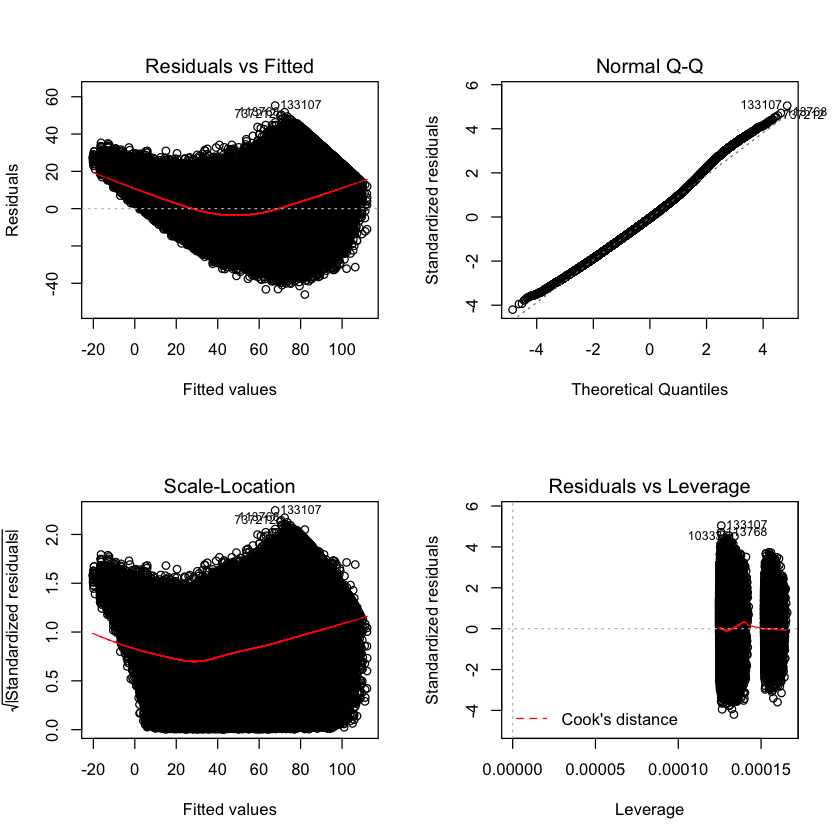

In [75]:
par(mfrow=c(2,2))
plot(trial4)
par(mfrow=c(1,1))

Rounding Data

In [76]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(train4))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(train4)), size = smp_size)

train6z <- train4[train_ind, ]
test6 <- train4[-train_ind, ]

trial6x <- lm(Sales ~ Store + Item + Day + Month + Year, data = train6z)
forecast6 <- predict(trial6x, test6)

smape(test6$Sales, round(forecast6,2))

[1] 0.2312398